<p style="font-size:300%; background-color:#456E9F; color:#FFFFFF; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Lab 11: Pancakes With A Problem!</p>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Juan Diego Bencardino</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> jdbencardinop@unal.edu.co</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br>Universidad Nacional de Colombia - Sede Bogotá</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Algorithms </p>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>Mayo 31, 2020</p>

![pancakespilesPythonlists.png](http://ungrid.unal.edu.co/gjhernandezp/algorithms/pancakes/pancakespilesPythonlistsonespatula.png)

In [1]:
import pydot
from collections import defaultdict 
from IPython.display import Image, display 

In [2]:
def lstr(p):
        return ''.join([str(elem)  for elem in p])

## Pancake Network Function

This function will help us graph all pancake networks using BFS, al Permutations will be nodes and they will be conected to other nodes if its possible to get to them in just one flip of the pancakes.

There are three inputs, _numpancakes_ is the size of the stack of pancakes that has to be ordered. _show_ is the option to graph the pancake network if its true, or juts the pn value if its false, the default is true. And _verbose_ gives a detailes explanation of what is doing the algorithm when set to true, the default is false

In [3]:
def pancakeNetwork(numpancakes, show=True, verbose=False):

    # Create dictionaries graph,visited 
    distance = {}
    # and pydot graph G anly if we want to show it
    if show:
        G = pydot.Dot(graph_type="graph",rankdir='DU', ratio='0.8', ranksep = '0.5')

    # Create a queue for BFS 
    queue = [] 

    # Mark the source node as visited and enqueue it 
    s = [i+1 for i in range(numpancakes)]
    queue.append(s) 
    # Also mark its distance as cero, and hold the value of max distance
    distance[lstr(s)] = 0
    maxdistance = 0;
    #Last visited elements
    lastpass = []
    
    # If we want to show the graph add the root node
    # color the rot node in green
    if show:
        root = pydot.Node(lstr(s), color='blue', penwidth='3.0')
        root.set_label(lstr(s) + "\n" + str(0))
        G.add_node(root)
    
    while queue:
        # Dequeue a node
        current = queue.pop(0)
        
        # Add in case is the las node
        lastpass.append(current)
        
        # Mark to show the algorithms process
        if verbose:
            print(">current " + lstr(current))
                
        # Check al flips of the stack
        for i in range(len(current) - 1):
            
            d = current[i+1::-1] + current[i+2:]
            
            #if the flip has not been found yet
            if not lstr(d) in distance.keys():
                if verbose:
                    print("+added " + lstr(d))
                    
                # Compute its distance and update maxdistance
                # then enqueue the node
                newdist = distance[lstr(current)] +1
                distance[lstr(d)] = newdist
                maxdistance = max([newdist,maxdistance])
                queue.append(d)
                #this is not the last node
                lastpass = []
                
                if show:
                    #add the node to the graph
                    node = pydot.Node(lstr(d))
                    node.set_label(lstr(d) + "\n" + str(newdist))
                    node.set_penwidth('3.0')
                    G.add_node(node)
                
            # Draw each edge just once but dont skip edges
            # this is achieved comparing the strings
            if lstr(current) < lstr(d) and show:
                if verbose:
                    print("edge " + lstr(d) + " " + lstr(current))
                    
                newedge = pydot.Edge(lstr(d),lstr(current))
                G.add_edge(newedge)
    
    nunmax = 0;
    for arr in lastpass:
        if(distance[lstr(arr)] == maxdistance):
            nunmax += 1
            #Change the color of the nodes most far away
            if show:
                node = G.get_node(lstr(arr))
                node[0].set_color('darkorange')
        
    if show:
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)
    # Print the value on Pn
    print("Pn: %d\nNodos con distancia Pn: %d" %(maxdistance,nunmax))

## Pancake Network Graphs

We are going to use de funciton _pancakeNetwokr_ to print the image of the pancake Networks until n = 5, after that there are too many nodes and pydot fails to render them all on screen.

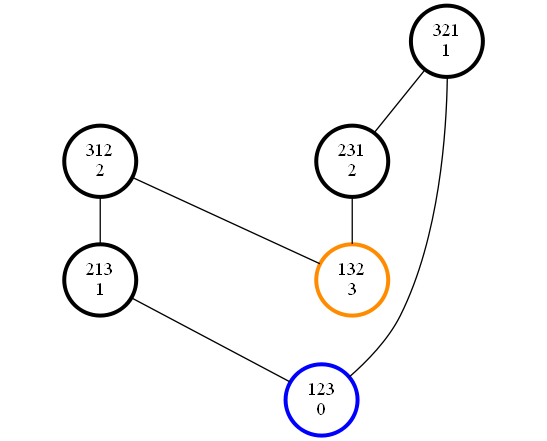

Pn: 3
Nodos con distancia Pn: 1


In [4]:
pancakeNetwork(3)

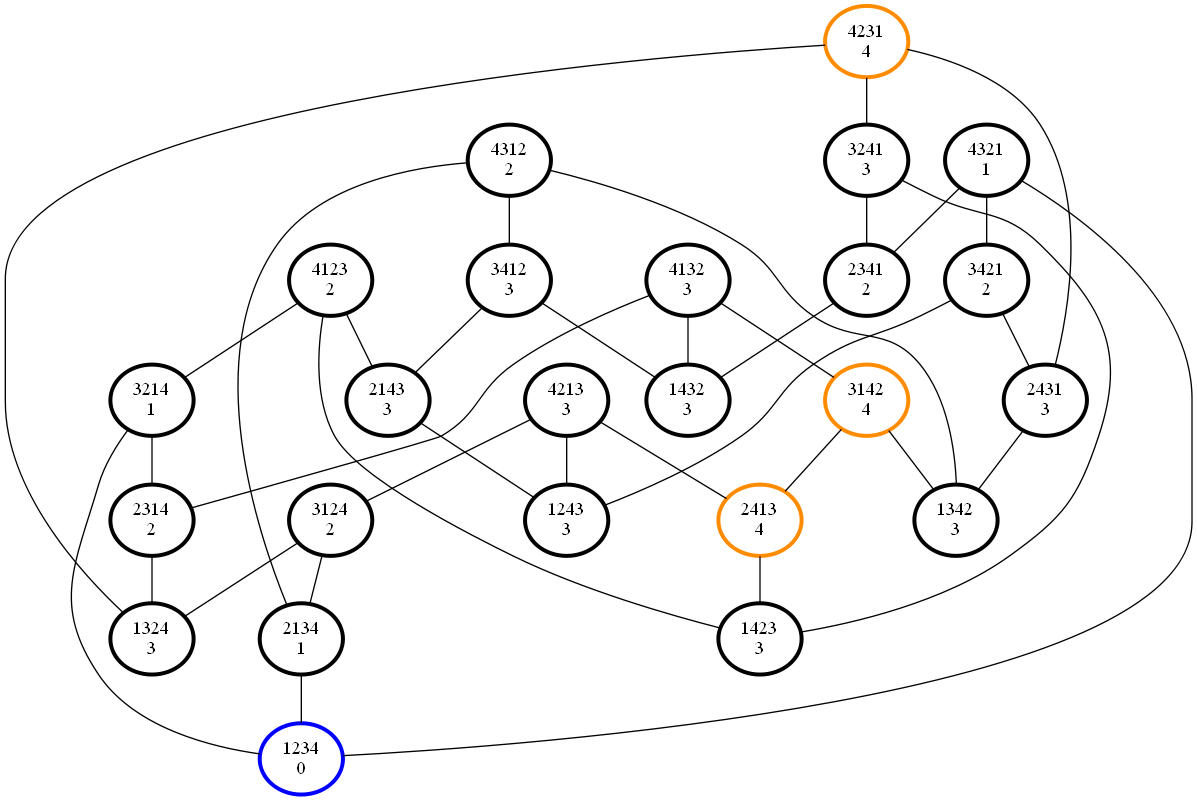

Pn: 4
Nodos con distancia Pn: 3


In [5]:
pancakeNetwork(4)

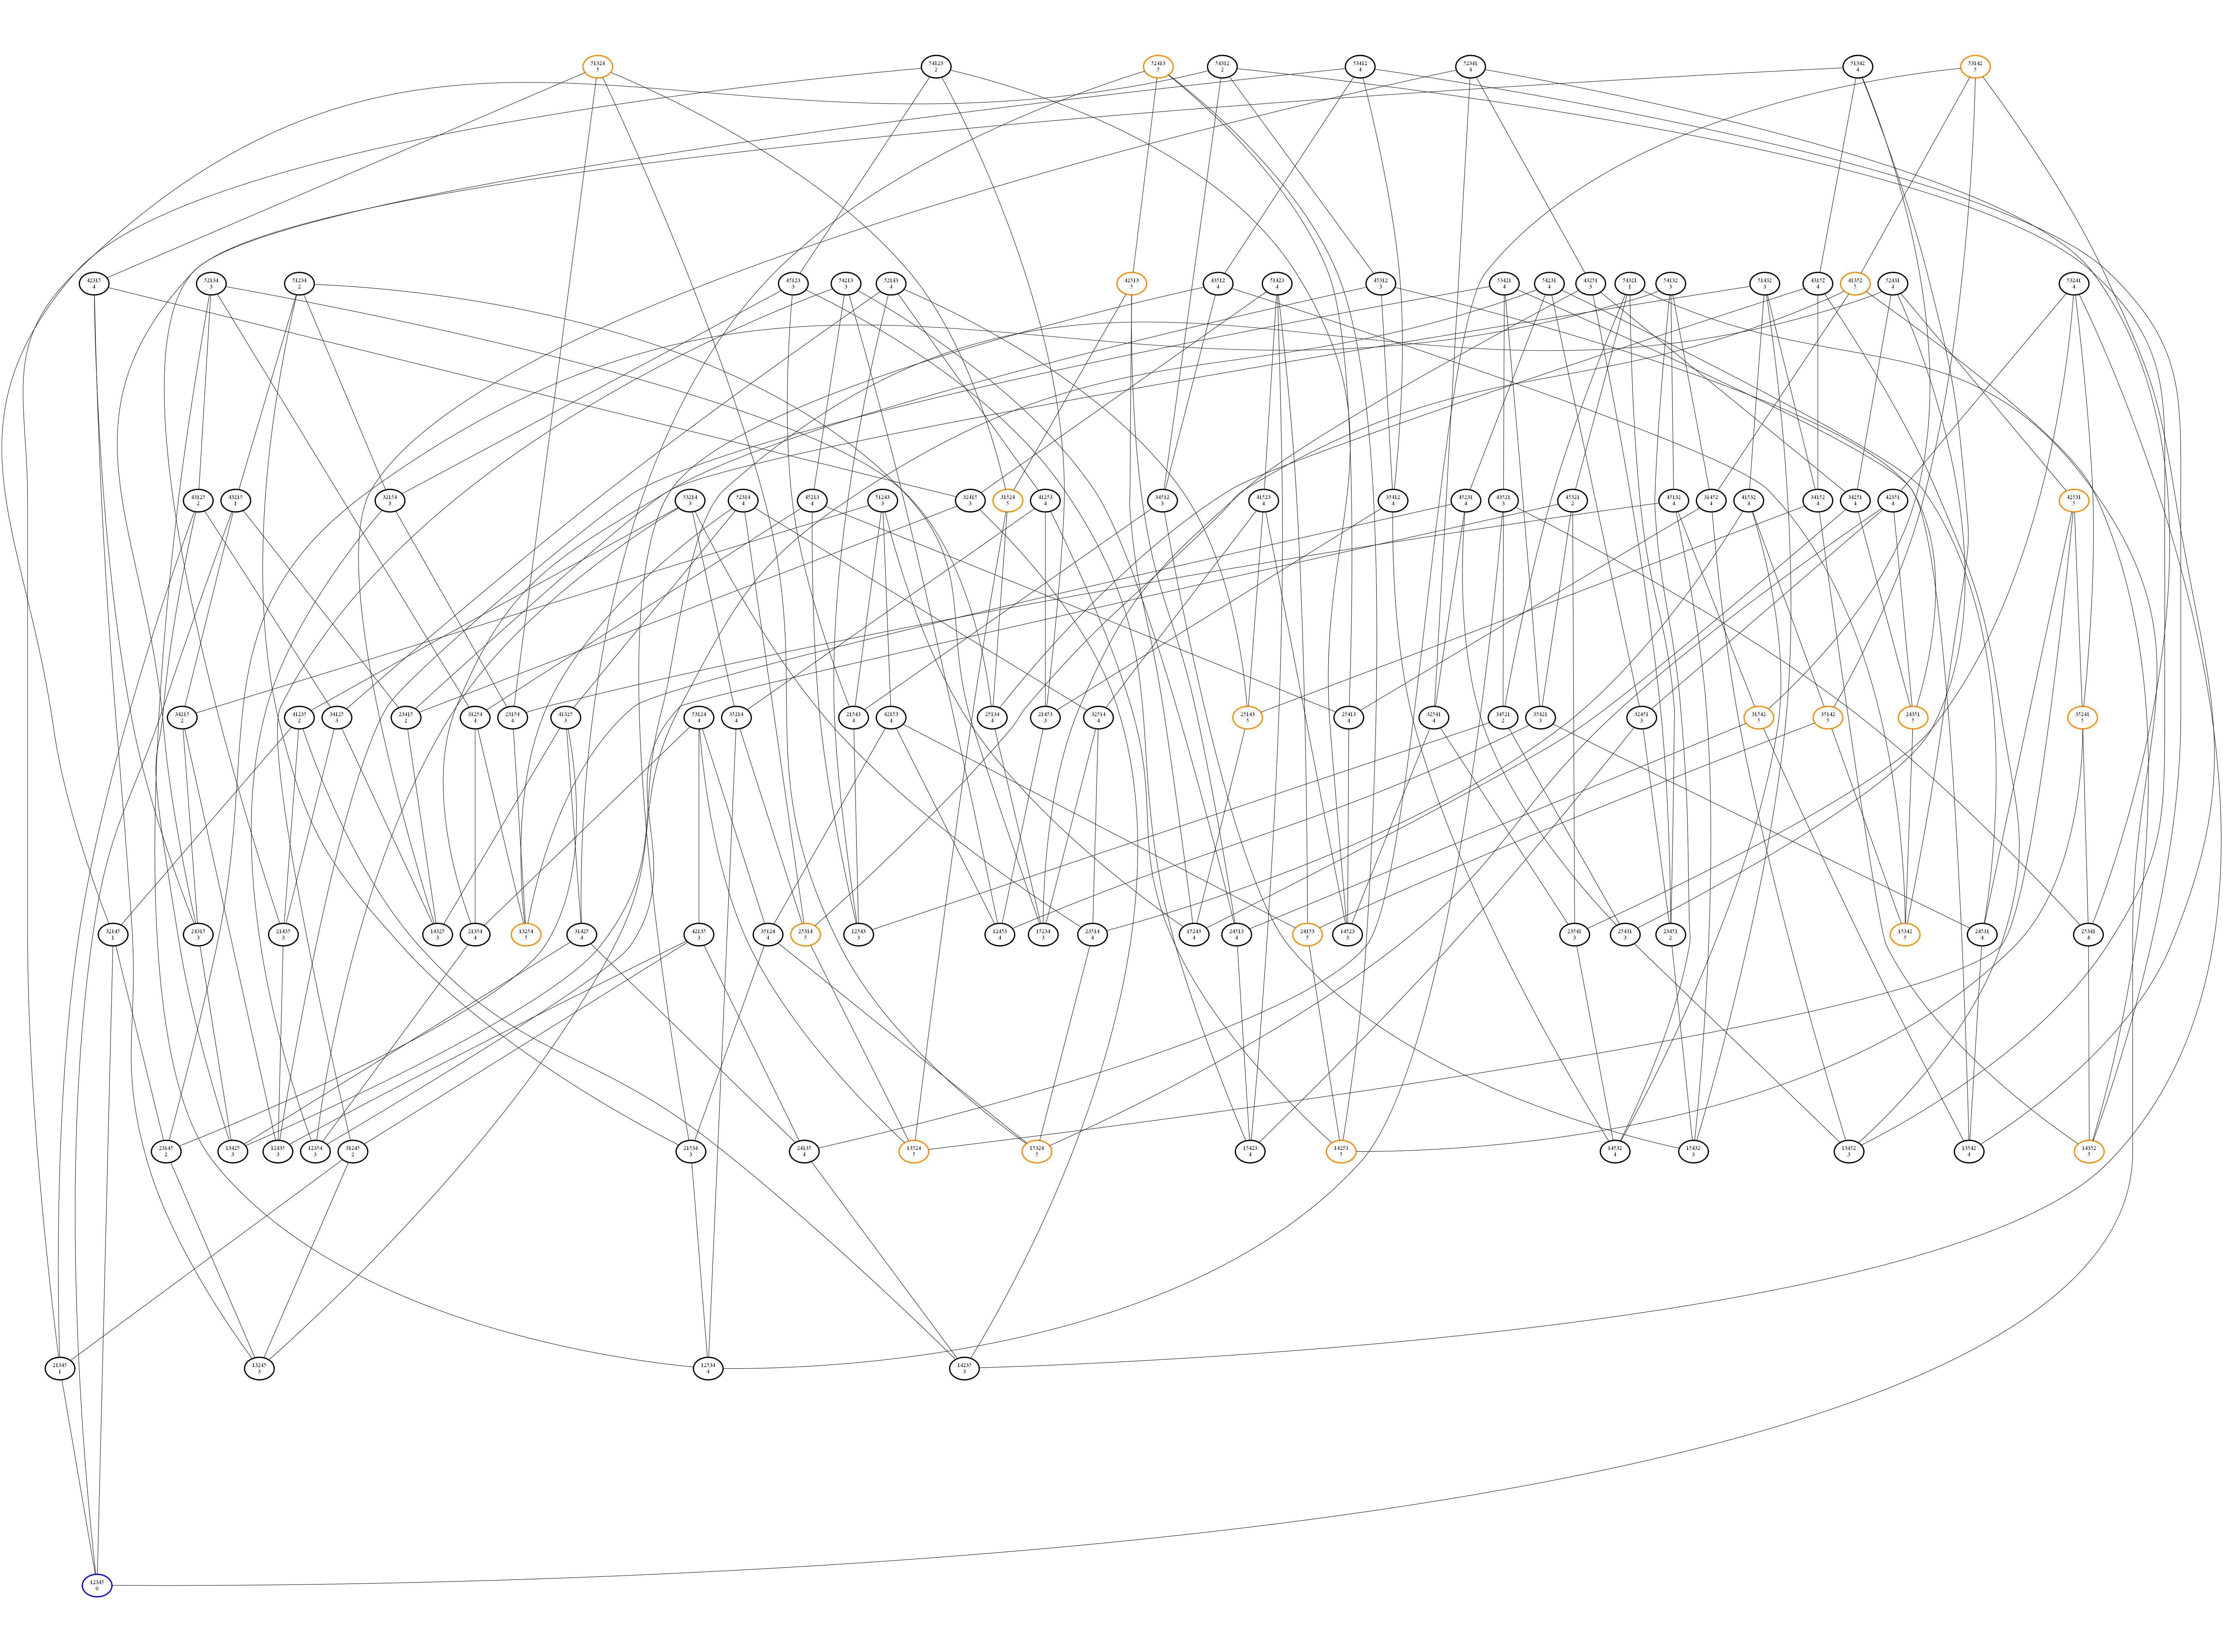

Pn: 5
Nodos con distancia Pn: 20


In [6]:
pancakeNetwork(5)

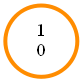

Pn: 0
Nodos con distancia Pn: 1


In [7]:
pancakeNetwork(1)

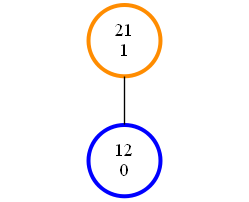

Pn: 1
Nodos con distancia Pn: 1


In [8]:
pancakeNetwork(2)

# Calcular Pn sin graficar

Para esto hacemos uso de la misma función _pancakeNetork_ pero usando el parámetro opcional _show_.

Se empezará haciendo manualmente el cálculo desde n = 5 hasta 9, que se realizan en poco tiempo, los posteriores se dejaron corriendo toda la noche para determinar hasta qué punto llegan.

También se medirá el tiempo aproximado por cálculo, para poder determinar cuánto sería el tiempo necesario para calcular más valores de Pn

### N = 5

In [9]:
%%time
pancakeNetwork(5,show=False)

Pn: 5
Nodos con distancia Pn: 20
Wall time: 14.6 ms


### N = 6

In [10]:
%%time
pancakeNetwork(6,show=False)

Pn: 7
Nodos con distancia Pn: 2
Wall time: 49 ms


### N = 7

In [11]:
%%time
pancakeNetwork(7,show=False)

Pn: 8
Nodos con distancia Pn: 35
Wall time: 502 ms


### N = 8

In [12]:
%%time
pancakeNetwork(8,show=False)

Pn: 9
Nodos con distancia Pn: 455
Wall time: 4.6 s


### N = 9

In [13]:
%%time
pancakeNetwork(9,show=False)

Pn: 10
Nodos con distancia Pn: 5804
Wall time: 1min 36s


### N = 10

In [14]:
%%time
pancakeNetwork(10,show=False)

Pn: 11
Nodos con distancia Pn: 73232
Wall time: 42min 30s


We can now see that the time grows really fast, when you do the math the time complexity of grows as O(n*(n!)^2), thats is because BFS has time complexity of O(|V||E|), where |V| is the number of nodes and |E| is the number of edges.

One can show that the number of nodes is n!, becuase every node is a permutation of the numbers from 1 to n. Then for |E| we can note that every Node has n-1, this is because there are n-1 positions where you can insert the spatula to make a flip. So there are n!(n-1)/2 edges. So the total runtime is O(n! x n!(n-1)). which in turn is __O(n*(n!)^2)__

## Infinite Cycle to calculate various Pn 

We left the loop going for about 10 hours, an it only reached n=10, our calculations suggest that it would take around a day to compute Pn of n = 11.

An if you see the cycle, it only goes to 13, because accorging to our calculations it would take about 3000 thousand years to calculate it, so no point no to beyond that.

In [15]:
%%time
for i in range(5,14):
    print("n: %d" %i)
    pancakeNetwork(i, show=False)
    print("----------------------------------")

n: 5
Pn: 5
Nodos con distancia Pn: 20
----------------------------------
n: 6
Pn: 7
Nodos con distancia Pn: 2
----------------------------------
n: 7
Pn: 8
Nodos con distancia Pn: 35
----------------------------------
n: 8
Pn: 9
Nodos con distancia Pn: 455
----------------------------------
n: 9
Pn: 10
Nodos con distancia Pn: 5804
----------------------------------
n: 10
Pn: 11
Nodos con distancia Pn: 73232
----------------------------------
n: 11


KeyboardInterrupt: 

## Two Spatulas Tree  BFS Modification

We are going to use de original BFS algorithm but now we are goind to consider the aditional transformations of a permutation with 2 spatulas.

This mean that we just have to add one more loop to account fo the evariations of the second spatula acording to the first one, so we can connect every possible flip to the node it came from, the resto of the code can be leaved unchanged. This changes will be reflected in line 30 to 34, where we add the new loop, add the comments and added the new permutation to be evaluated and pushed into the stack.

In [44]:
def twoSpatulaBFS(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph", rankdir='DU', ratio='0.8', ranksep = '0.5')
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]
            node = pydot.Node(lstr(s))
            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                # added a new loop to iterate the second spatula
                for j in range(i+1,len(s)):
                    # leave the preffix before i and the suffinx after j the same
                    # invert the order of the pancakes in the middle
                    d = s[:i] + s[j:None if i-1 < 0 else i-1 :-1] + s[j+1:]
                    
                    if (d != s) and not(lstr(d) in visited.keys()):

                      if(d != sorted(d)):
                        node = pydot.Node(lstr(d))
                      else:
                        node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green

                      G.add_node(node)
                      edge = pydot.Edge(lstr(s),lstr(d))
                      G.add_edge(edge)
                      graph[lstr(s)].append(lstr(d))
                      queue.append(d) 
                      visited[lstr(d)] = True 

        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

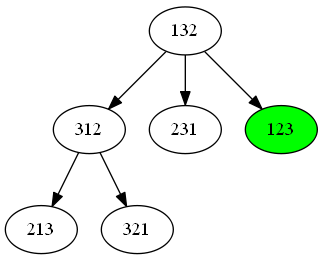

In [45]:
p = [1,3,2]
twoSpatulaBFS(p)

We can also adjust the Pre sols variation of the code to color in yellow the nodes that are just one step away from sorting the array with the same changes

In [46]:
def twoSpatulaBFSPreSols(s): 

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph", rankdir='DU', ratio='0.8', ranksep = '0.5')
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append(s) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            s = queue.pop(0) 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                    # leave the preffix before i and the suffinx after j the same
                    # invert the order of the pancakes in the middle
                    d = s[:i] + s[j:None if i-1 < 0 else i-1 :-1] + s[j+1:] 
                    if (d != s) and not(lstr(d) in visited.keys()):

                      if(d != sorted(d)):
                         node = pydot.Node(lstr(d))
                      else:
                        node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green

                      G.add_node(node)
                      edge = pydot.Edge(lstr(s),lstr(d))
                      G.add_edge(edge)
                      graph[lstr(s)].append(lstr(d))
                      queue.append(d) 
                      visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

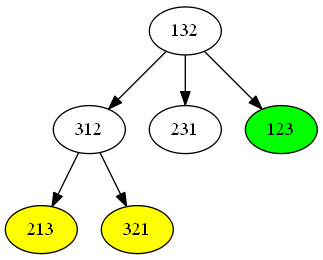

In [47]:
p = [1,3,2]
twoSpatulaBFSPreSols(p)

We can also adjust the Pre sols by level variation of the code to color in yellow the nodes that are just one step away from sorting the array with the same changes

In [59]:
def twoSpatulaBFSPreSolsLevel(s,L):  

        # Create dictionaries graph,visited and pydot graph G
        graph = defaultdict()
        visited = defaultdict()
        G = pydot.Dot(graph_type="digraph", rankdir='UD', ratio='0.3')
        
        # Create a queue for BFS 
        queue = [] 
  
        # Mark the source node as visited and enqueue it 
        queue.append([s,0]) 
        visited[lstr(s)] = True
  
        while queue: 
  
            # Dequeue a vertex from queue 
            e = queue.pop(0)
            s = e[0]
            l = e[1] 
            graph[lstr(s)]=[]

            flag = False
            for i in range(len(s)-1):
                d = s[i+1::-1] + s[i+2:]
                if(d == sorted(d)):
                     flag = True
            if flag:
              node = pydot.Node(lstr(s),style="filled", fillcolor="yellow")
            else: 
              node = pydot.Node(lstr(s))

            G.add_node(node)
            
            # Get all adjacent vertices of the 
            # dequeued vertex s. If a adjacent 
            # has not been visited, then mark it 
            # visited and enqueue it 
            if(s != sorted(s)) and (l < L):
              for i in range(len(s)-1):
                for j in range(i+1,len(s)):
                    # leave the preffix before i and the suffinx after j the same
                    # invert the order of the pancakes in the middle
                    d = s[:i] + s[j:None if i-1 < 0 else i-1 :-1] + s[j+1:] 
                    if (d != s) and not(lstr(d) in visited.keys()):

                      if(d != sorted(d)):
                         node = pydot.Node(lstr(d))
                      else:
                        node = pydot.Node(lstr(d),style="filled", fillcolor="green") # first sorted green

                      G.add_node(node)
                      edge = pydot.Edge(lstr(s),lstr(d))
                      G.add_edge(edge)
                      graph[lstr(s)].append(lstr(d))
                      queue.append([d,l+1]) 
                      visited[lstr(d)] = True 
              
        # Dsplay the pydot graph G
        im = Image(G.create_png())
        display(im)

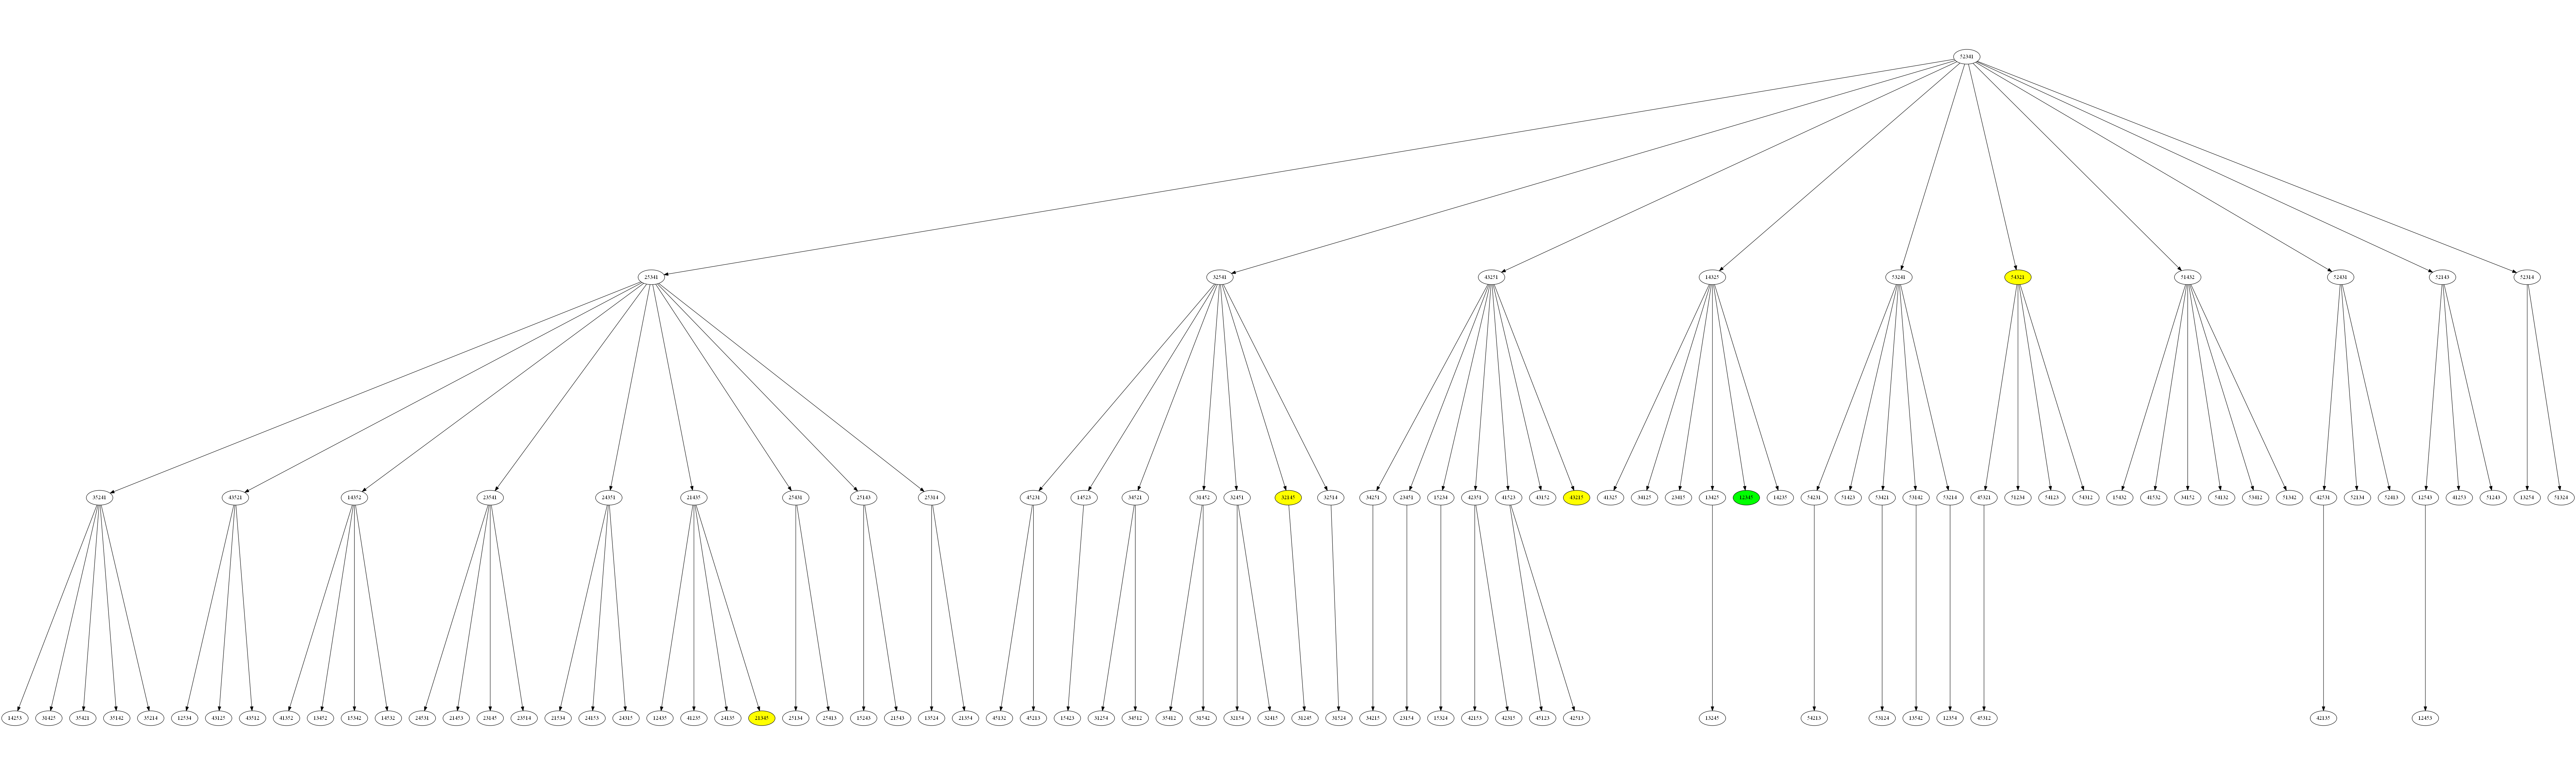

In [60]:
p = [5,2,3,4,1]
twoSpatulaBFSPreSolsLevel(p,3)

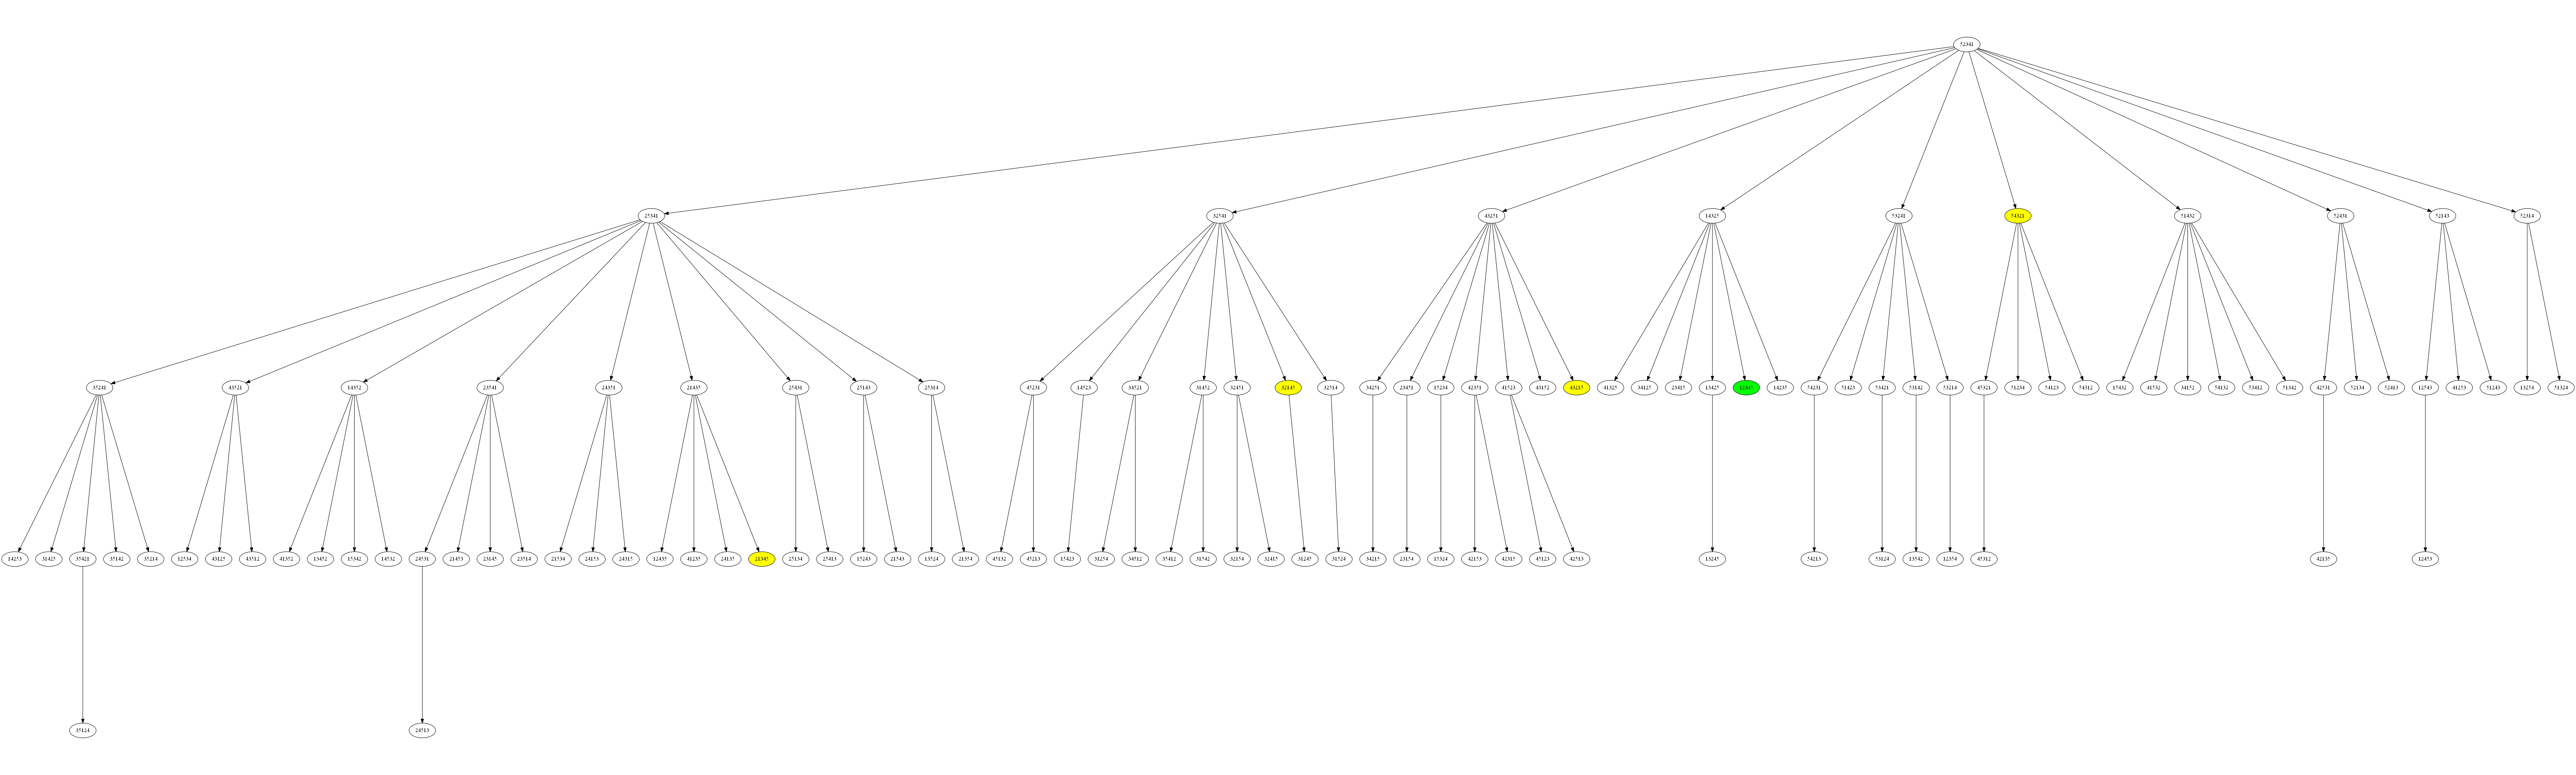

In [61]:
twoSpatulaBFSPreSolsLevel(p,5)

Solving for a case with n = 4, we see that it does not reach five levels, this is because as we have more connections the tree get more shallow

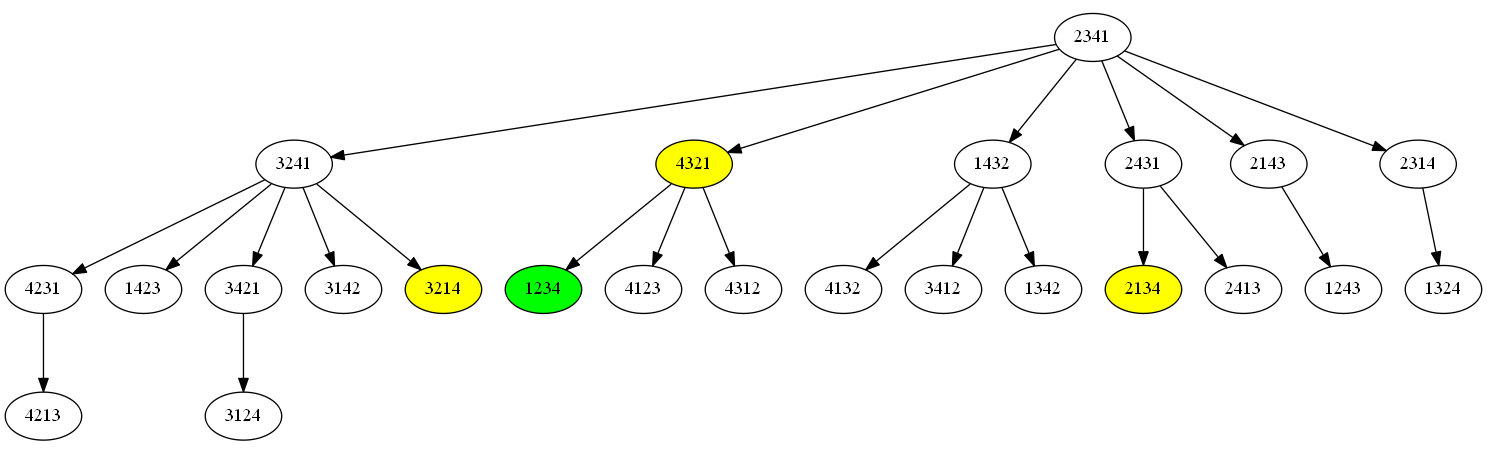

In [63]:
p = [2,3,4,1]
twoSpatulaBFSPreSolsLevel(p,5)

## References

- Breadth First Search or BFS for a Graph https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/

- Graph visualization using Python https://www.youtube.com/watch?v=SpDI6-FvtJY

- nikhilkumarsingh
/
PyDot-Examples https://github.com/nikhilkumarsingh/PyDot-Examples/blob/master/Directory_Structure_Plotter.ipynb

- pydot https://pypi.org/project/pydot/

- Graphviz https://www.graphviz.org/

- NetworkX https://networkx.github.io/


